In [ ]:
# Importing librabries.
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Downloading the dataset as json.
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2021-07-01 09:44:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.9.208, 172.217.164.176, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.9.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2021-07-01 09:44:51 (157 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
# Global variables.
VOCAB_SIZE = 10000
EMBEDDING_DIM = 16
MAX_LENGTH = 100
TRUNC_TYPE='post'
PADDING_TYPE='post'
OOV_TOK = "<OOV>"
TRAINING_SIZE = 21000
NUM_EPOCHS = 15

In [ ]:
# Read the json file
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

In [ ]:
# Length of dataset
print(len(datastore))

26709


In [ ]:
sentences = [sentence['headline'] for sentence in datastore]

In [ ]:
labels= [label['is_sarcastic'] for label in datastore]

In [ ]:
train_sentences = sentences[0:TRAINING_SIZE]
test_sentences = sentences[TRAINING_SIZE:]
train_labels = labels[0:TRAINING_SIZE]
test_labels = labels[TRAINING_SIZE:]

In [ ]:
print(type(train_sentences))
print(type(train_labels))
print(type(test_sentences))
print(type(test_labels))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [ ]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOK)
tokenizer.fit_on_texts(train_sentences)
# train_sentences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_pad = pad_sequences(train_sequences, truncating=TRUNC_TYPE,\
                          padding=PADDING_TYPE, maxlen=MAX_LENGTH)
# test_sentences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_pad = pad_sequences(test_sequences, truncating=TRUNC_TYPE, \
                         padding=PADDING_TYPE, maxlen=MAX_LENGTH)

In [ ]:
print(type(train_pad))
print(type(test_pad))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
train_pad = np.array(train_pad)
train_labels = np.array(train_labels)
test_pad = np.array(test_pad)
test_labels = np.array(test_labels)
print(type(train_labels))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, \
                                      input_length=MAX_LENGTH),
                                     
    tensorflow.keras.layers.GlobalAveragePooling1D(),

    tensorflow.keras.layers.Dense(24, activation='relu'),
    
    tensorflow.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Split ~.25
history = model.fit(train_pad, train_labels, epochs=NUM_EPOCHS, validation_data=(test_pad, test_labels), verbose=2)

Epoch 1/15
594/594 - 3s - loss: 0.6701 - accuracy: 0.5764 - val_loss: 0.6058 - val_accuracy: 0.7884
Epoch 2/15
594/594 - 2s - loss: 0.4626 - accuracy: 0.8219 - val_loss: 0.4034 - val_accuracy: 0.8290
Epoch 3/15
594/594 - 2s - loss: 0.3286 - accuracy: 0.8701 - val_loss: 0.3593 - val_accuracy: 0.8450
Epoch 4/15
594/594 - 2s - loss: 0.2731 - accuracy: 0.8918 - val_loss: 0.3578 - val_accuracy: 0.8430
Epoch 5/15
594/594 - 2s - loss: 0.2360 - accuracy: 0.9077 - val_loss: 0.3398 - val_accuracy: 0.8547
Epoch 6/15
594/594 - 2s - loss: 0.2073 - accuracy: 0.9213 - val_loss: 0.3460 - val_accuracy: 0.8517
Epoch 7/15
594/594 - 2s - loss: 0.1855 - accuracy: 0.9299 - val_loss: 0.3547 - val_accuracy: 0.8506
Epoch 8/15
594/594 - 2s - loss: 0.1661 - accuracy: 0.9387 - val_loss: 0.3585 - val_accuracy: 0.8550
Epoch 9/15
594/594 - 2s - loss: 0.1482 - accuracy: 0.9474 - val_loss: 0.3729 - val_accuracy: 0.8532
Epoch 10/15
594/594 - 2s - loss: 0.1352 - accuracy: 0.9524 - val_loss: 0.3962 - val_accuracy: 0.8494

In [ ]:
# Split ~.30
history = model.fit(train_pad, train_labels, epochs=NUM_EPOCHS, validation_data=(test_pad, test_labels), verbose=2)

Epoch 1/15
657/657 - 3s - loss: 0.6734 - accuracy: 0.5747 - val_loss: 0.5983 - val_accuracy: 0.7616
Epoch 2/15
657/657 - 2s - loss: 0.4473 - accuracy: 0.8191 - val_loss: 0.3858 - val_accuracy: 0.8390
Epoch 3/15
657/657 - 2s - loss: 0.3196 - accuracy: 0.8710 - val_loss: 0.3598 - val_accuracy: 0.8429
Epoch 4/15
657/657 - 2s - loss: 0.2681 - accuracy: 0.8950 - val_loss: 0.3750 - val_accuracy: 0.8289
Epoch 5/15
657/657 - 2s - loss: 0.2340 - accuracy: 0.9096 - val_loss: 0.3558 - val_accuracy: 0.8525
Epoch 6/15
657/657 - 2s - loss: 0.2053 - accuracy: 0.9210 - val_loss: 0.3473 - val_accuracy: 0.8529
Epoch 7/15
657/657 - 2s - loss: 0.1824 - accuracy: 0.9310 - val_loss: 0.3588 - val_accuracy: 0.8539
Epoch 8/15
657/657 - 2s - loss: 0.1649 - accuracy: 0.9381 - val_loss: 0.3745 - val_accuracy: 0.8499
Epoch 9/15
657/657 - 2s - loss: 0.1493 - accuracy: 0.9456 - val_loss: 0.3868 - val_accuracy: 0.8537
Epoch 10/15
657/657 - 2s - loss: 0.1373 - accuracy: 0.9503 - val_loss: 0.4252 - val_accuracy: 0.8432

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


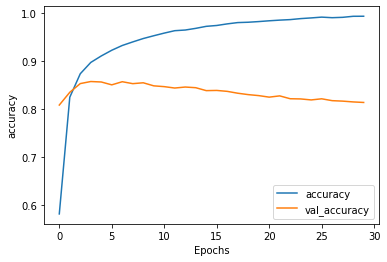

In [ ]:
# When we take the split at ~75%
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

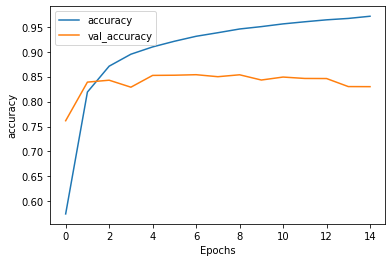

In [ ]:
# When we take the split at ~80%
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [ ]:
word_index = tokenizer.word_index

In [ ]:
word_index.keys()

dict_keys(['<OOV>', 'to', 'of', 'the', 'in', 'for', 'a', 'on', 'and', 'with', 'is', 'new', 'trump', 'man', 'from', 'at', 'about', 'you', 'by', 'this', 'after', 'up', 'out', 'be', 'how', 'that', 'it', 'as', 'not', 'are', 'your', 'what', 'his', 'all', 'he', 'who', 'just', 'has', 'will', 'more', 'into', 'one', 'year', 'report', 'have', 'over', 'why', 'area', 'donald', 'u', 'day', 'can', 'says', 's', 'first', 'woman', 'time', 'like', 'get', 'her', 'old', "trump's", 'no', 'now', 'off', 'an', 'life', 'obama', 'people', 'women', 'than', "'", 'house', 'was', 'back', 'still', 'white', 'make', 'down', 'clinton', 'when', 'my', 'if', '5', 'i', 'we', 'americans', 'could', 'world', 'way', 'do', 'study', 'before', 'they', 'their', 'most', 'family', 'gop', 'best', 'black', "it's", 'bill', 'should', 'school', 'only', 'him', 'years', 'watch', 'would', 'being', '3', 'but', 'really', 'police', 'so', 'video', 'president', '10', 'know', 'finds', "can't", 'american', 'last', 'going', 'death', 'show', 'things

In [ ]:
word_index.items()

dict_items([('<OOV>', 1), ('to', 2), ('of', 3), ('the', 4), ('in', 5), ('for', 6), ('a', 7), ('on', 8), ('and', 9), ('with', 10), ('is', 11), ('new', 12), ('trump', 13), ('man', 14), ('from', 15), ('at', 16), ('about', 17), ('you', 18), ('by', 19), ('this', 20), ('after', 21), ('up', 22), ('out', 23), ('be', 24), ('how', 25), ('that', 26), ('it', 27), ('as', 28), ('not', 29), ('are', 30), ('your', 31), ('what', 32), ('his', 33), ('all', 34), ('he', 35), ('who', 36), ('just', 37), ('has', 38), ('will', 39), ('more', 40), ('into', 41), ('one', 42), ('year', 43), ('report', 44), ('have', 45), ('over', 46), ('why', 47), ('area', 48), ('donald', 49), ('u', 50), ('day', 51), ('can', 52), ('says', 53), ('s', 54), ('first', 55), ('woman', 56), ('time', 57), ('like', 58), ('get', 59), ('her', 60), ('old', 61), ("trump's", 62), ('no', 63), ('now', 64), ('off', 65), ('an', 66), ('life', 67), ('obama', 68), ('people', 69), ('women', 70), ('than', 71), ("'", 72), ('house', 73), ('was', 74), ('back'

In [ ]:
value_key_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([value_key_word_index.get(i, '?') for i in text])

print(decode_sentence(train_pad[1]))
print(train_sentences[1])
print(labels[1])

the 'roseanne' revival catches up to our thorny political mood for better and worse ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
the 'roseanne' revival catches up to our thorny political mood, for better and worse
0


In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real",\
            "game of thrones season finale showing this sunday night",]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=MAX_LENGTH, padding=PADDING_TYPE, \
                       truncating=TRUNC_TYPE)
print(model.predict(padded))

[[0.9591607 ]
 [0.12353215]]
